In [8]:
# load libraries and scripts
import JSON
using Plots
using HDF5
using Trapz
using Statistics
include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/disturbances.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")

perform_dyn_sim (generic function with 1 method)

In [9]:
#load borders
data, keys = import_json_numerics("../data/test/circle.json")
border = 1000*data["border"]

border


201×2 Matrix{Float64}:
 495.405  858.067
 468.072  873.28
 440.275  887.627
 412.041  901.094
 383.397  913.668
 354.373  925.336
 324.997  936.086
 295.297  945.908
 265.304  954.792
 235.046  962.73
 204.554  969.714
 173.858  975.736
 142.987  980.792
   ⋮      
 758.084  638.433
 737.52   662.006
 716.226  684.921
 694.223  707.156
 671.532  728.689
 648.176  749.498
 624.178  769.564
 599.561  788.866
 574.351  807.385
 548.571  825.103
 522.247  842.002
 495.405  858.067

In [10]:
# create the lattice grid
dx = 20 
Nx, Ny, xrange, yrange, isinside, isborder, n = get_grid(border, Float64(dx))

isgrid = isinside .| isborder
isout = .!isinside .& .!isborder

# define x and y coordinate for plotting
#x = repeat(reshape(xrange,1,Nx), Ny, 1)
#y = repeat(reshape(yrange,Ny,1), 1, Nx);
x = repeat(reshape(1:Nx,1,Nx), Ny, 1)
y = repeat(reshape(1:Ny,Ny,1), 1, Nx);
xr = 1:Nx
yr = 1:Ny

1:104

In [11]:
#plot(border[:,1], border[:,2])
scatter(2*x[isinside], 2*y[isinside], label="inside", markersize=3)
scatter!(2*x[isborder], 2*y[isborder], label="boundary", markersize=3)
scatter!(2*x[isout], 2*y[isout],label="ouside", markersize=3)
quiver!(vec(2*xr[Int64.(n[:,2])]), vec(2*yr[Int64.(n[:,1])]),
    quiver=(8*vec(n[:,4]), 8*vec(n[:,3])), linewidth=0.5)
savefig("figure_a.pdf")

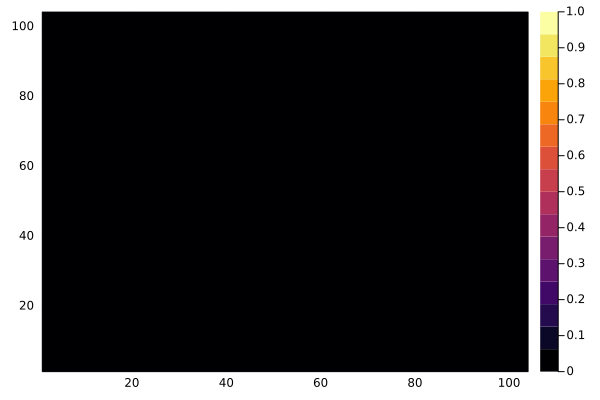

In [12]:
bx = 2 * ones(Ny, Nx)
by = 2 * ones(Ny, Nx)

# adding
#bx .+= local_disturbance(isinside, xrange, yrange, [-200., 250.], 4E6, 500.)
#by .+= local_disturbance(isinside, xrange, yrange, [-200., 250.], 4E6, 500.)

#no static injection
p = zeros(Ny, Nx)

# one "punctual" generator and one load
#p = local_disturbance(isinside, xrange, yrange, [-200.0, -0.0], 9.0, 100.)
#p .+= local_disturbance(isinside, xrange, yrange, [200.0, -0.0], -9.0, 100.)
contour(p, fill=true)

[1000.0 0.0]
  1.570397 seconds (56.32 M allocations: 942.030 MiB, 13.62% gc time, 42.78% compilation time)


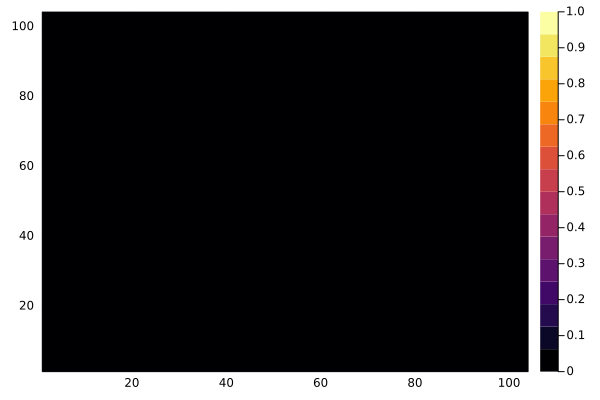

In [13]:
# compute the stable solution
th_ref, ths = compute_stable_sol(isinside, n, bx, by, p, Niter=14000, interval= 1000, tol=1E-9)
contour(th_ref, fill=true)

In [14]:
# evolution for debugging
#ctr_movie(Float64.(1:size(ths,3)), ths)
m = 1E-5*ones(Ny, Nx)
d = 0.6*copy(m)

m[.!isgrid] .= 0.0
d[.!isgrid] .= 0.0

3039-element view(::Vector{Float64}, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  10807, 10808, 10809, 10810, 10811, 10812, 10813, 10814, 10815, 10816]) with eltype Float64:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [ ]:
# perform a dynamical simulation
# adding a fault
#p = local_disturbance(isinside, xrange, yrange, [750.0, -250.0], -9.0, 100.)
p = local_disturbance(isinside, xrange, yrange, [0.0, 0.0], -9.0, 100.)

#p = local_disturbance(isinside, xrange, yrange, [100.0, -100.], -9.0, 100.)
ts, thetas, omegas = perform_dyn_sim(isinside, n, bx, by, p, m, d, th_ref, interval = 1000, Ndt = Int64(1E5), dt = 0.0001);

NIter: 1000
NIter: 2000
NIter: 3000
NIter: 4000
NIter: 5000
NIter: 6000
NIter: 7000
NIter: 8000
NIter: 9000
NIter: 10000
NIter: 11000
NIter: 12000
NIter: 13000
NIter: 14000
NIter: 15000
NIter: 16000
NIter: 17000
NIter: 18000
NIter: 19000
NIter: 20000
NIter: 21000
NIter: 22000
NIter: 23000
NIter: 24000
NIter: 25000
NIter: 26000
NIter: 27000
NIter: 28000
NIter: 29000
NIter: 30000
NIter: 31000
NIter: 32000
NIter: 33000
NIter: 34000
NIter: 35000
NIter: 36000
NIter: 37000
NIter: 38000
NIter: 39000
NIter: 40000
NIter: 41000
NIter: 42000
NIter: 43000
NIter: 44000
NIter: 45000
NIter: 46000
NIter: 47000
NIter: 48000
NIter: 49000
NIter: 50000
NIter: 51000
NIter: 52000
NIter: 53000
NIter: 54000
NIter: 55000
NIter: 56000
NIter: 57000
NIter: 58000
NIter: 59000
NIter: 60000
NIter: 61000
NIter: 62000
NIter: 63000
NIter: 64000
NIter: 65000
NIter: 66000
NIter: 67000
NIter: 68000
NIter: 69000
NIter: 70000
NIter: 71000
NIter: 72000
NIter: 73000
NIter: 74000
NIter: 75000
NIter: 76000
NIter: 77000
NIter: 7

In [ ]:
# plotting the frequency a different locations
coord = [0 -750; 0.0 0.0; -500 500; 500. 500.]
#coord = [-250.0 -0; 0.0 0.0; 250 -250; 50. -480.]
time_plot(ts, omegas, coord, tstart = 0.0, tend=50.0, borders = [border])
current()
#savefig("freq.pdf")


In [ ]:
# evolution of the frequency
#ctr_movie(ts, omegas, tstart = 0.0, tend=50.0)

In [ ]:
# post-fault frequency
#println(sum(omegas[isinside,end])/sum(isinside))
#println(sum(omegas[isgrid,end])/sum(isgrid))
println(sum(p)/sum(d))
println(sum(p[isgrid])/sum(d[isgrid]))
println(sum(p[isinside])/sum(d[isinside]))
#trapz((yrange,xrange),p)/trapz((yrange,xrange),d) 